In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
print(os.listdir('../data/chest_xray/'))
print(os.listdir('../data/chest_xray/train'))
print(os.listdir('../data/chest_xray/test'))

['test', 'train']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


In [3]:
root_dir = '../data/chest_xray'
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')
train_pn_dir = os.path.join(train_dir, 'PNEUMONIA')
train_nor_dir = os.path.join(train_dir, 'NORMAL')
test_pn_dir = os.path.join(test_dir, 'PNEUMONIA')
test_nor_dir = os.path.join(test_dir, 'NORMAL')

In [7]:
print("No of training pneumonia class samples :",len(os.listdir(train_pn_dir)))
print("No of training normal class samples :",len(os.listdir(train_nor_dir)))
print("No of testing pneumonia class samples :",len(os.listdir(test_pn_dir)))
print("No of testing normal class samples :",len(os.listdir(test_nor_dir)))

No of training pneumonia class samples : 3883
No of training normal class samples : 1349
No of testing pneumonia class samples : 390
No of testing normal class samples : 234


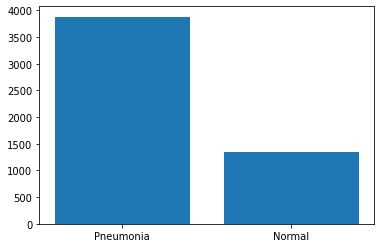

In [26]:
plt.bar(['Pneumonia', 'Normal'],[len(os.listdir(train_pn_dir)), len(os.listdir(train_nor_dir))], )
plt.show()

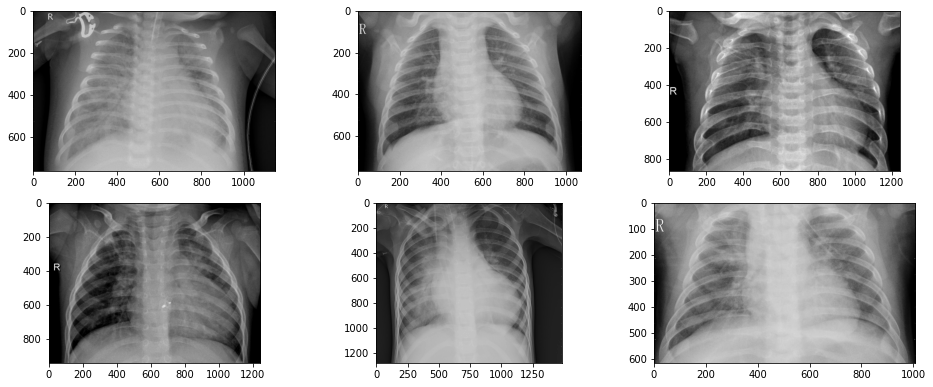

In [13]:
pneumonia_images = os.listdir(train_pn_dir)
plt.figure(figsize=(16, 10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(train_pn_dir, pneumonia_images[i]))
    plt.imshow(img, cmap='gray')
plt.show()

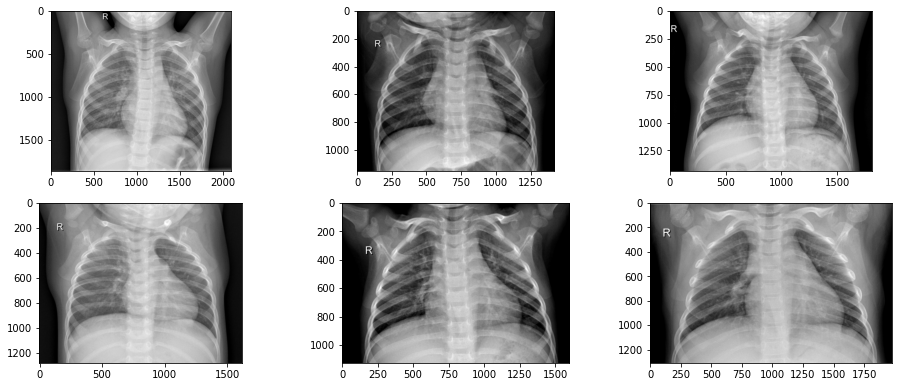

In [14]:
normal_images = os.listdir(train_nor_dir)
plt.figure(figsize=(16, 10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(train_nor_dir, normal_images[i]))
    plt.imshow(img, cmap='gray')
plt.show()

In [14]:
igen_train = ImageDataGenerator(
    rescale = 1/255,
    validation_split=0.2,
    zoom_range=0.2,
    horizontal_flip = True
)
igen_validation = ImageDataGenerator(rescale = 1/255)
igen_test = ImageDataGenerator(rescale = 1/255)

In [15]:
train = igen_train.flow_from_directory(train_dir, 
                                            target_size=(150, 150),
                                            subset = 'training',
                                            batch_size = 32,
                                            class_mode = 'binary')

validation = igen_train.flow_from_directory(train_dir, 
                                            target_size=(150, 150),
                                            subset = 'validation',
                                            batch_size = 32,
                                            class_mode = 'binary')

test = igen_test.flow_from_directory(test_dir, 
                                            target_size=(150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
train.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [17]:
train.image_shape

(150, 150, 3)

In [18]:
model = Sequential()

model.add(Conv2D(32, (5,5), padding='SAME', activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (5,5), padding='SAME', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [20]:
model.compile(Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
trained_model = model.fit(train, epochs = 12, validation_data = validation)

Epoch 1/12
131/131 [==============================] - 166s 1s/step - loss: 0.4310 - accuracy: 0.8099 - val_loss: 0.4288 - val_accuracy: 0.7943
Epoch 2/12
131/131 [==============================] - 74s 562ms/step - loss: 0.2946 - accuracy: 0.8775 - val_loss: 0.3185 - val_accuracy: 0.8833
Epoch 3/12
131/131 [==============================] - 89s 678ms/step - loss: 0.2487 - accuracy: 0.9026 - val_loss: 0.2761 - val_accuracy: 0.9014
Epoch 4/12
131/131 [==============================] - 118s 905ms/step - loss: 0.2478 - accuracy: 0.9088 - val_loss: 0.3265 - val_accuracy: 0.8536
Epoch 5/12
131/131 [==============================] - 104s 791ms/step - loss: 0.2473 - accuracy: 0.9002 - val_loss: 0.2896 - val_accuracy: 0.8871
Epoch 6/12
131/131 [==============================] - 93s 711ms/step - loss: 0.2196 - accuracy: 0.9157 - val_loss: 0.2481 - val_accuracy: 0.8986
Epoch 7/12
131/131 [==============================] - 74s 565ms/step - loss: 0.2165 - accuracy: 0.9095 - val_loss: 0.2764 - val_ac

In [23]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

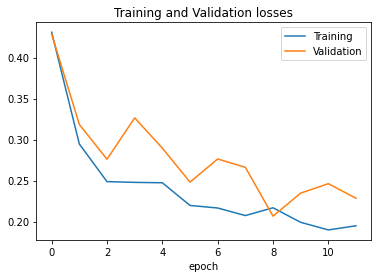

In [24]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

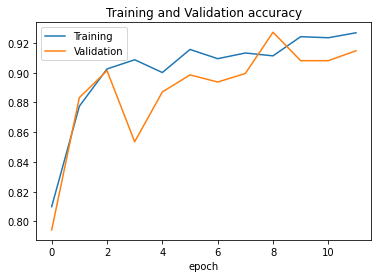

In [25]:
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [27]:
loss, acc = model.evaluate(test)
print(loss)
print(acc*100, "%", sep="")

20/20 [==============================] - 7s 330ms/step - loss: 0.3925 - accuracy: 0.8494
0.39248594641685486
84.93589758872986
